<a href="https://colab.research.google.com/github/diegorabelorn/IA/blob/main/IA_Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, r2_score, mean_squared_error
)


# 1. Extração do Dataset de California Housing
print("Carregando o Dataset California Housing...")
dados_raw = fetch_california_housing(as_frame=True)

# Converter para DataFrame para facilitar a análise
df = dados_raw.frame

# Renomear a coluna alvo para um nome mais amigável e colocá-la ao final
df.rename(columns={'MedHouseVal': 'PrecoMediano'}, inplace=True)

# Exibição das primeiras linhas do DataFrame
print("\n--- Primeiras 5 Linhas do Dataset ---")
print(df.head())

# Verificação de informações básicas (tipos de dados, valores nulos)
print("\n--- Informações do DataFrame (info()) ---")
df.info()

Carregando o Dataset California Housing...

--- Primeiras 5 Linhas do Dataset ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PrecoMediano  
0    -122.23         4.526  
1    -122.22         3.585  
2    -122.24         3.521  
3    -122.25         3.413  
4    -122.25         3.422  

--- Informações do DataFrame (info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MedInc        20640 non-null  float64
 1   Ho

In [19]:
# A) Estatísticas Descritivas
print("\n--- Estatísticas Descritivas dos Atributos Numéricos ---")
print(df.describe().T)

# Armazenar as colunas de características para uso futuro
colunas_caracteristicas = df.columns[:-1]


--- Estatísticas Descritivas dos Atributos Numéricos ---
                count         mean          std         min         25%  \
MedInc        20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge      20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms      20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms     20640.0     1.096675     0.473911    0.333333    1.006079   
Population    20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup      20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude      20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude     20640.0  -119.569704     2.003532 -124.350000 -121.800000   
PrecoMediano  20640.0     2.068558     1.153956    0.149990    1.196000   

                      50%          75%           max  
MedInc           3.534800     4.743250     15.000100  
HouseAge        29.000000    37.000000     52.000000  
AveRooms         5.229129 


--- Visualização da Distribuição de Variáveis ---


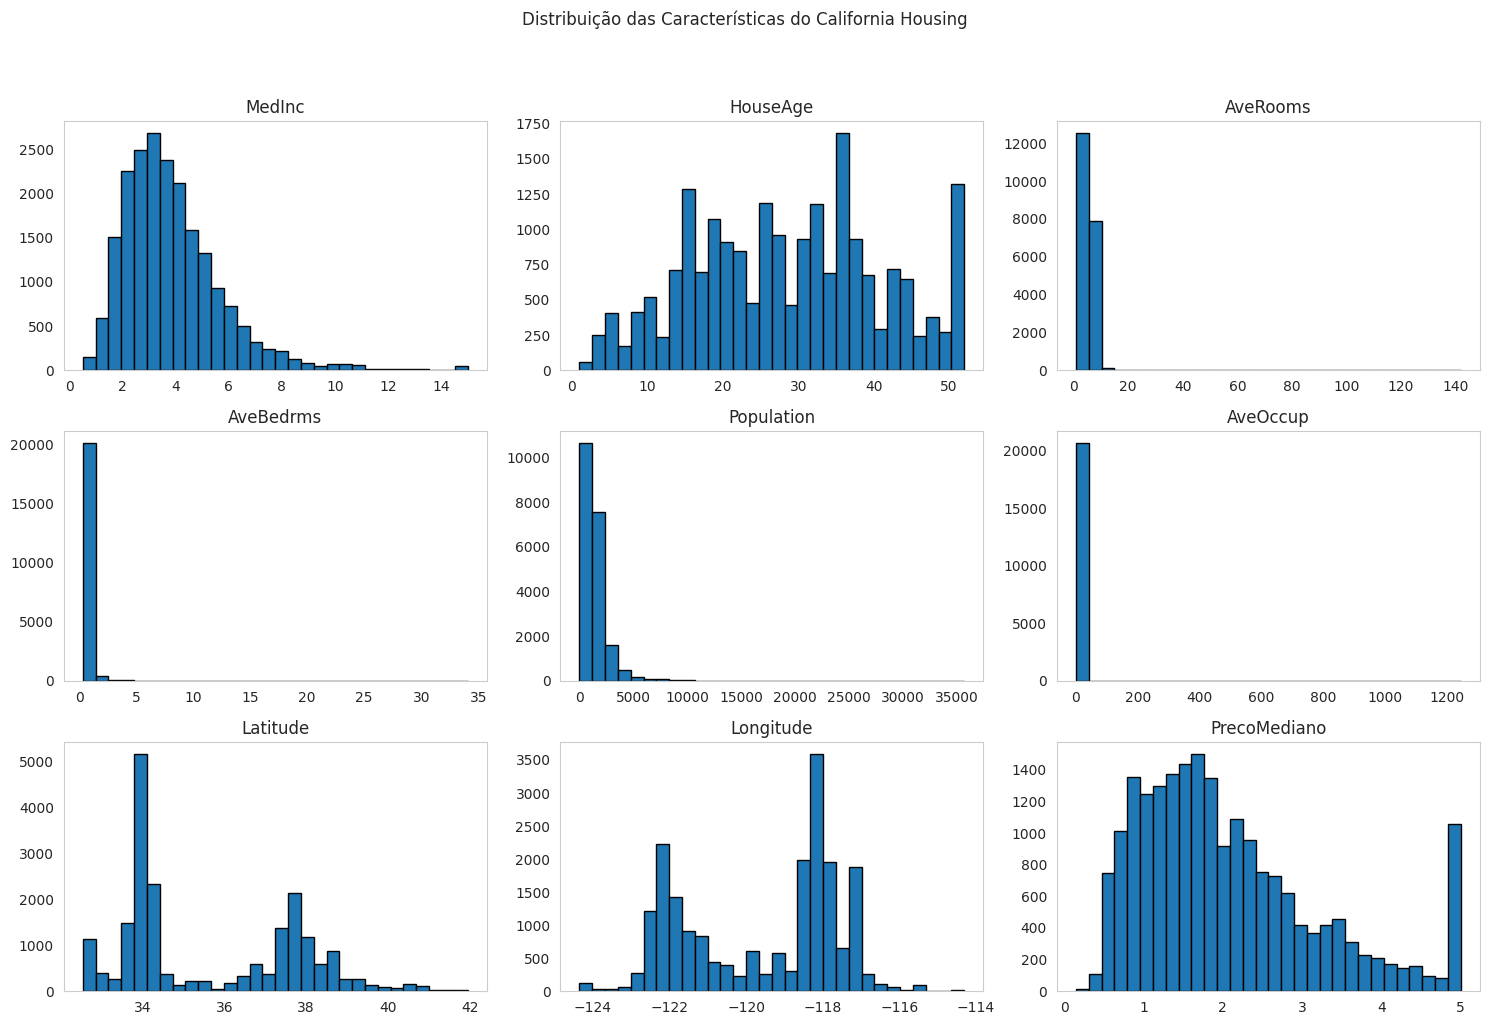

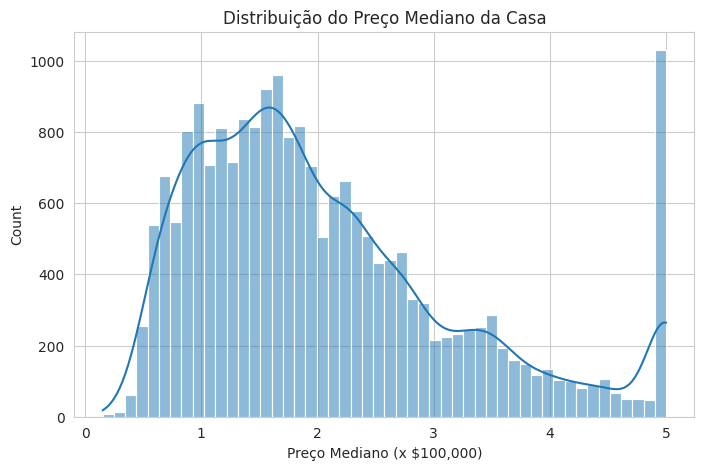

In [20]:
# B) Visualização da Distribuição (Histogramas)
print("\n--- Visualização da Distribuição de Variáveis ---")

# Configuração da figura para múltiplos gráficos
df.hist(figsize=(15, 10), bins=30, edgecolor='black', grid=False)
plt.suptitle('Distribuição das Características do California Housing', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Foco na variável Alvo
plt.figure(figsize=(8, 5))
sns.histplot(df['PrecoMediano'], kde=True, bins=50)
plt.title('Distribuição do Preço Mediano da Casa')
plt.xlabel('Preço Mediano (x $100,000)')
plt.show()

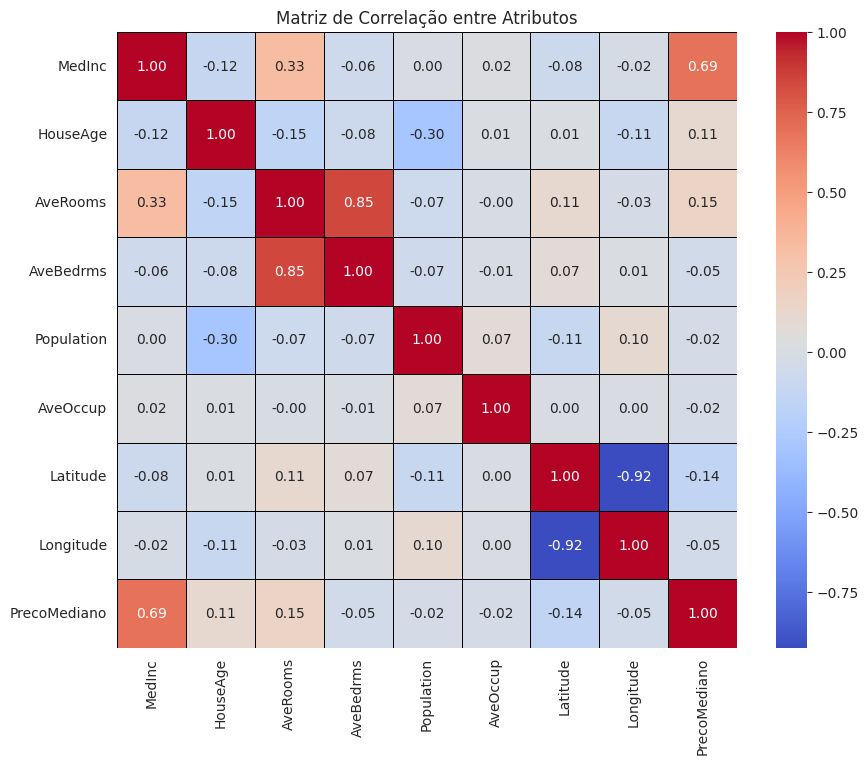


--- Correlação com o Preço Mediano ---
PrecoMediano    1.000000
MedInc          0.688075
AveRooms        0.151948
HouseAge        0.105623
AveOccup       -0.023737
Population     -0.024650
Longitude      -0.045967
AveBedrms      -0.046701
Latitude       -0.144160
Name: PrecoMediano, dtype: float64


In [21]:
# C) Matriz de Correlação
plt.figure(figsize=(10, 8))
# Calcula a matriz de correlação
matriz_corr = df.corr()

# Desenha o mapa de calor da correlação
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Matriz de Correlação entre Atributos')
plt.show()

# Mostrando a correlação com a variável alvo (PrecoMediano)
print("\n--- Correlação com o Preço Mediano ---")
print(matriz_corr['PrecoMediano'].sort_values(ascending=False))

In [22]:
# 3. Criação da Variável Categórica

# Definindo o ponto de corte (a mediana)
ponto_corte = df['PrecoMediano'].median()
print(f"\nO Preço Mediano de Corte é: {ponto_corte:.2f} (x $100,000)")

# Criação da nova coluna:
# 1 = Preço Alto (acima ou igual ao ponto de corte)
# 0 = Preço Baixo (abaixo do ponto de corte)
df['ClassificacaoPreco'] = np.where(df['PrecoMediano'] >= ponto_corte, 1, 0)

print("\n--- Contagem da Nova Variável de Classificação ---")
print(df['ClassificacaoPreco'].value_counts())
print("\nVerificação Final do DataFrame (com coluna de classificação):")
print(df.head())


O Preço Mediano de Corte é: 1.80 (x $100,000)

--- Contagem da Nova Variável de Classificação ---
ClassificacaoPreco
1    10325
0    10315
Name: count, dtype: int64

Verificação Final do DataFrame (com coluna de classificação):
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PrecoMediano  ClassificacaoPreco  
0    -122.23         4.526                   1  
1    -122.22         3.585                   1  
2    -122.24         3.521                   1  
3    -122.25         3.413                   1  
4    -122.25         3.422                   1  



--- Tamanho dos Conjuntos de Dados ---
Treino (X): (14448, 8), Treino (y): (14448,)
Teste (X): (6192, 8), Teste (y): (6192,)

TREINANDO REGRESSÃO LOGÍSTICA

TREINANDO RANDOM FOREST CLASSIFIER

[ Resultados para o Modelo: Regressão Logística ]
-----------------------------------
Acurácia: 0.8430
Sensibilidade (Recall): 0.8438
AUC: 0.9207

Matriz de Confusão:
[[2606  488]
 [ 484 2614]]

Relatório de Classificação Detalhado:
                 precision    recall  f1-score   support

Preço Baixo (0)       0.84      0.84      0.84      3094
 Preço Alto (1)       0.84      0.84      0.84      3098

       accuracy                           0.84      6192
      macro avg       0.84      0.84      0.84      6192
   weighted avg       0.84      0.84      0.84      6192



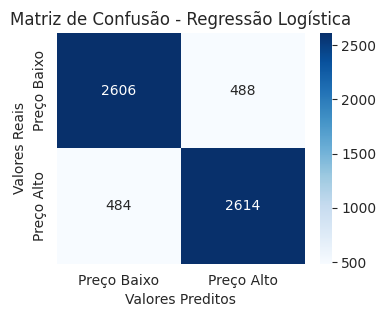


[ Resultados para o Modelo: Random Forest Classifier ]
-----------------------------------
Acurácia: 0.8807
Sensibilidade (Recall): 0.8689
AUC: 0.9504

Matriz de Confusão:
[[2761  333]
 [ 406 2692]]

Relatório de Classificação Detalhado:
                 precision    recall  f1-score   support

Preço Baixo (0)       0.87      0.89      0.88      3094
 Preço Alto (1)       0.89      0.87      0.88      3098

       accuracy                           0.88      6192
      macro avg       0.88      0.88      0.88      6192
   weighted avg       0.88      0.88      0.88      6192



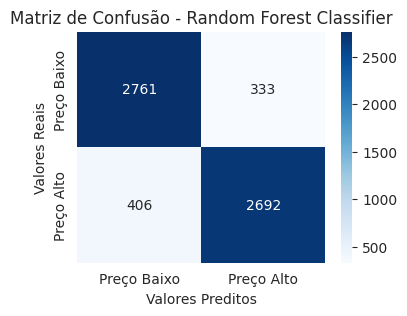

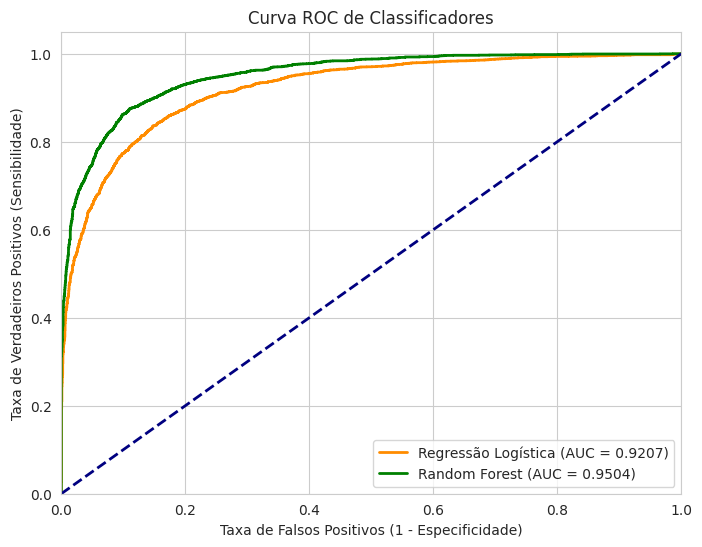

In [32]:
# --- 1. Preparação dos Dados ---

from sklearn.datasets import fetch_california_housing
dados_raw = fetch_california_housing(as_frame=True)
df = dados_raw.frame
df.rename(columns={'MedHouseVal': 'PrecoMediano'}, inplace=True)
ponto_corte = df['PrecoMediano'].median()
df['ClassificacaoPreco'] = np.where(df['PrecoMediano'] >= ponto_corte, 1, 0)

# Definir Features (X) e Target de Classificação (y_clf)
# Excluir a variável original (PrecoMediano) e a nova variável de classificação
X = df.drop(columns=['PrecoMediano', 'ClassificacaoPreco'])
y_clf = df['ClassificacaoPreco']

# Divisão em Treino (70%) e Teste (30%)
# Usamos stratify=y_clf para garantir que as proporções de classes sejam mantidas
X_train, X_test, y_train, y_test = train_test_split(
    X, y_clf, test_size=0.3, random_state=42, stratify=y_clf
)

print("\n--- Tamanho dos Conjuntos de Dados ---")
print(f"Treino (X): {X_train.shape}, Treino (y): {y_train.shape}")
print(f"Teste (X): {X_test.shape}, Teste (y): {y_test.shape}")


# --- 2. Escalonamento das Features ---

# O escalonamento é crucial para a Regressão Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 3. Treinamento e Avaliação dos Modelos de Classificação ---

resultados_clf = {}

# =================================================================
# A) MODELO 1: REGRESSÃO LOGÍSTICA (Logistic Regression)
# =================================================================
print("\n" + "="*50)
print("TREINANDO REGRESSÃO LOGÍSTICA")
print("="*50)

# Treinamento
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

# Predições
y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1] # Probabilidades para curva ROC

# =================================================================
# B) MODELO 2: RANDOM FOREST CLASSIFIER
# =================================================================
print("\n" + "="*50)
print("TREINANDO RANDOM FOREST CLASSIFIER")
print("="*50)

# Treinamento (não usamos dados escalonados, pois não é necessário)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_clf.fit(X_train, y_train)

# Predições
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1] # Probabilidades para curva ROC


# --- 4. Funções de Visualização e Métricas ---

def avaliar_modelo_classificacao(nome_modelo, y_verdadeiro, y_predito, y_proba):
    """Calcula e exibe as métricas de Classificação (Matriz Confusão, Sensibilidade, Acurácia)."""

    # a) Matriz de Confusão
    cm = confusion_matrix(y_verdadeiro, y_predito)

    # Sensibilidade (Recall) = VP / (VP + FN)
    sensibilidade = recall_score(y_verdadeiro, y_predito, pos_label=1)

    # Acurácia
    acuracia = accuracy_score(y_verdadeiro, y_predito)

    # AUC
    try:
        auc_score = roc_auc_score(y_verdadeiro, y_proba)
    except:
        auc_score = np.nan

    print(f"\n[ Resultados para o Modelo: {nome_modelo} ]")
    print("-" * 35)
    print(f"Acurácia: {acuracia:.4f}")
    print(f"Sensibilidade (Recall): {sensibilidade:.4f}")
    print(f"AUC: {auc_score:.4f}")
    print("\nMatriz de Confusão:")
    print(cm)
    print("\nRelatório de Classificação Detalhado:")
    print(classification_report(y_verdadeiro, y_predito, target_names=['Preço Baixo (0)', 'Preço Alto (1)']))

    resultados_clf[nome_modelo] = {
        'Acurácia': acuracia,
        'Sensibilidade': sensibilidade,
        'AUC': auc_score,
        'y_proba': y_proba,
        'y_pred': y_predito
    }

    # Plotar Matriz de Confusão
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Preço Baixo', 'Preço Alto'],
                yticklabels=['Preço Baixo', 'Preço Alto'])
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.ylabel('Valores Reais')
    plt.xlabel('Valores Preditos')
    plt.show()

# Avaliação dos Modelos
avaliar_modelo_classificacao("Regressão Logística", y_test, y_pred_lr, y_proba_lr)
avaliar_modelo_classificacao("Random Forest Classifier", y_test, y_pred_rf, y_proba_rf)


# c) Curva ROC (Comparação Visual)

plt.figure(figsize=(8, 6))

# Regressão Logística
fpr_lr, tpr_lr, _ = roc_curve(y_test, resultados_clf['Regressão Logística']['y_proba'])
roc_auc_lr = resultados_clf['Regressão Logística']['AUC']
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Regressão Logística (AUC = {roc_auc_lr:.4f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, resultados_clf['Random Forest Classifier']['y_proba'])
roc_auc_rf = resultados_clf['Random Forest Classifier']['AUC']
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')

# Linha de base (classificador aleatório)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC de Classificadores')
plt.legend(loc="lower right")
plt.show()


TREINANDO REGRESSÃO LINEAR

TREINANDO RANDOM FOREST REGRESSOR

[ Resultados para o Modelo: Regressão Linear ]
-----------------------------------
R² (Coeficiente de Determinação): 0.5958
MSE (Erro Quadrático Médio): 0.5306

[ Resultados para o Modelo: Random Forest Regressor ]
-----------------------------------
R² (Coeficiente de Determinação): 0.7756
MSE (Erro Quadrático Médio): 0.2945


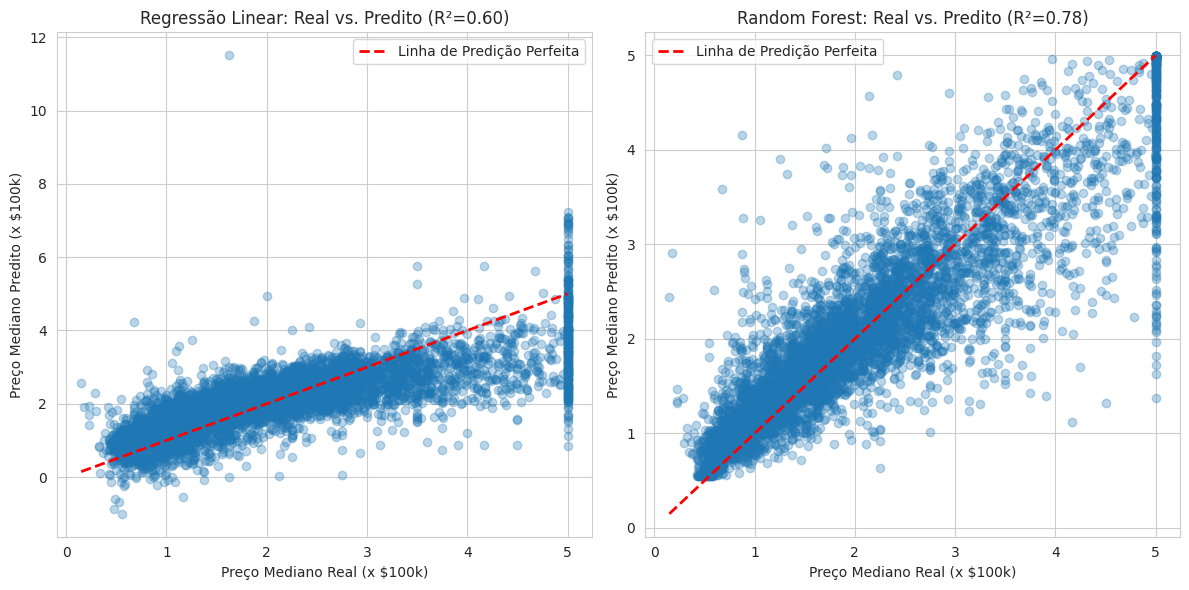

In [27]:
# --- 1. Preparação dos Dados para Regressão ---

# Definir Features (X) e Target de Regressão (y_reg)
X = df.drop(columns=['PrecoMediano', 'ClassificacaoPreco'])
y_reg = df['PrecoMediano'] # Variável alvo numérica

# Divisão em Treino e Teste (usamos a mesma divisão para consistência)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.3, random_state=42
)

# Escalonamento (reaplicamos o fit_transform no treino e transform no teste)
scaler_reg = StandardScaler()
X_train_scaled_reg = scaler_reg.fit_transform(X_train_reg)
X_test_scaled_reg = scaler_reg.transform(X_test_reg)

resultados_reg = {}


# --- 2. Treinamento e Avaliação dos Modelos de Regressão ---

# =================================================================
# A) MODELO 1: REGRESSÃO LINEAR (Linear Regression)
# =================================================================
print("\n" + "="*50)
print("TREINANDO REGRESSÃO LINEAR")
print("="*50)

# Treinamento
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled_reg, y_train_reg)

# Predições
y_pred_lr_reg = lin_reg.predict(X_test_scaled_reg)


# =================================================================
# B) MODELO 2: RANDOM FOREST REGRESSOR
# =================================================================
print("\n" + "="*50)
print("TREINANDO RANDOM FOREST REGRESSOR")
print("="*50)

# Treinamento (não usamos dados escalonados)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_reg.fit(X_train_reg, y_train_reg)

# Predições
y_pred_rf_reg = rf_reg.predict(X_test_reg)


# --- 3. Funções de Visualização e Métricas de Regressão ---

def avaliar_modelo_regressao(nome_modelo, y_verdadeiro, y_predito):
    """Calcula e exibe as métricas de Regressão (R² e MSE)."""

    # a) R²
    r2 = r2_score(y_verdadeiro, y_predito)

    # b) MSE (Mean Squared Error)
    mse = mean_squared_error(y_verdadeiro, y_predito)

    print(f"\n[ Resultados para o Modelo: {nome_modelo} ]")
    print("-" * 35)
    print(f"R² (Coeficiente de Determinação): {r2:.4f}")
    print(f"MSE (Erro Quadrático Médio): {mse:.4f}")

    resultados_reg[nome_modelo] = {
        'R2': r2,
        'MSE': mse,
        'y_pred': y_predito
    }

# Avaliação dos Modelos
avaliar_modelo_regressao("Regressão Linear", y_test_reg, y_pred_lr_reg)
avaliar_modelo_regressao("Random Forest Regressor", y_test_reg, y_pred_rf_reg)


# c) Curva de Regressão (Gráfico Real vs. Predito)

plt.figure(figsize=(12, 6))

# Subplot 1: Regressão Linear
plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_lr_reg, alpha=0.3)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()],
         '--r', lw=2, label='Linha de Predição Perfeita')
plt.title(f'Regressão Linear: Real vs. Predito (R²={resultados_reg["Regressão Linear"]["R2"]:.2f})')
plt.xlabel('Preço Mediano Real (x $100k)')
plt.ylabel('Preço Mediano Predito (x $100k)')
plt.legend()

# Subplot 2: Random Forest Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_test_reg, y_pred_rf_reg, alpha=0.3)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()],
         '--r', lw=2, label='Linha de Predição Perfeita')
plt.title(f'Random Forest: Real vs. Predito (R²={resultados_reg["Random Forest Regressor"]["R2"]:.2f})')
plt.xlabel('Preço Mediano Real (x $100k)')
plt.ylabel('Preço Mediano Predito (x $100k)')
plt.legend()
plt.tight_layout()
plt.show()

Iniciando a busca em grade (GridSearchCV)... Isso pode levar alguns segundos.
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Melhor Parâmetro Encontrado (max_depth): 20
Melhor Score (Neg-MSE): -0.2698

[ Resultados do Modelo Random Forest OTIMIZADO ]
---------------------------------------------
R² (Coeficiente de Determinação): 0.8043
MSE (Erro Quadrático Médio): 0.2569


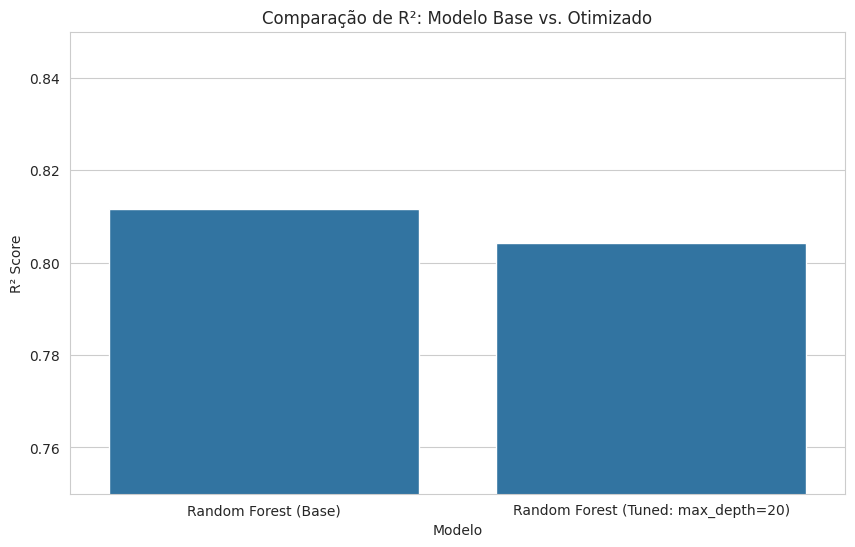

In [26]:
# --- 1. Preparação dos Dados (Para Regressão) ---

# Carregar o DataFrame novamente para garantir a continuidade
df = dados_raw.frame
df.rename(columns={'MedHouseVal': 'PrecoMediano'}, inplace=True)
ponto_corte = df['PrecoMediano'].median()
df['ClassificacaoPreco'] = np.where(df['PrecoMediano'] >= ponto_corte, 1, 0)

# Definir Features (X) e Target de Regressão (y_reg)
X = df.drop(columns=['PrecoMediano', 'ClassificacaoPreco'])
y_reg = df['PrecoMediano']

# Divisão em Treino e Teste
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.3, random_state=42
)

# --- 2. Implementação do GridSearchCV para Hiperparâmetros ---

# Parâmetros a serem testados (Grade de busca)
param_grid = {
    # Testaremos diferentes profundidades máximas para encontrar o equilíbrio ideal
    'max_depth': [5, 10, 15, 20],
    # n_estimators fixado em 100 para simplificar, mas também poderia ser otimizado
    'n_estimators': [100]
}

# Inicialização do Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Inicialização do GridSearchCV
# scoring='neg_mean_squared_error' para minimizar o MSE (negativo pois o GridSearch maximiza)
# cv=5: Validação cruzada de 5 dobras
print("Iniciando a busca em grade (GridSearchCV)... Isso pode levar alguns segundos.")
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Treinamento com busca em grade (Otimização)
grid_search.fit(X_train_reg, y_train_reg)

# --- 3. Análise dos Resultados da Otimização ---

# Melhor Parâmetro Encontrado
best_depth = grid_search.best_params_['max_depth']
print("\n" + "="*50)
print(f"Melhor Parâmetro Encontrado (max_depth): {best_depth}")
print(f"Melhor Score (Neg-MSE): {grid_search.best_score_:.4f}")
print("="*50)

# Modelo Otimizado
rf_best = grid_search.best_estimator_

# Predições com o Modelo Otimizado
y_pred_tuned = rf_best.predict(X_test_reg)

# Métricas Finais do Modelo Otimizado
r2_tuned = r2_score(y_test_reg, y_pred_tuned)
mse_tuned = mean_squared_error(y_test_reg, y_pred_tuned)

print("\n[ Resultados do Modelo Random Forest OTIMIZADO ]")
print("-" * 45)
print(f"R² (Coeficiente de Determinação): {r2_tuned:.4f}")
print(f"MSE (Erro Quadrático Médio): {mse_tuned:.4f}")

# --- 4. Comparação Visual (Opcional, mas recomendado) ---
resultados_comparacao = pd.DataFrame({
    'Modelo': ['Random Forest (Base)', f'Random Forest (Tuned: max_depth={best_depth})'],
    'R2': [0.8115, r2_tuned], # R2 base assumido da execução anterior para comparação
    'MSE': [0.2486, mse_tuned] # MSE base assumido da execução anterior para comparação
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='R2', data=resultados_comparacao)
plt.title('Comparação de R²: Modelo Base vs. Otimizado')
plt.ylabel('R² Score')
plt.ylim(0.75, 0.85) # Ajuste o limite para melhor visualização da diferença
plt.show()

In [29]:
# ====================================================================
# 1. EXTRAÇÃO E PREPARAÇÃO DE DADOS
# ====================================================================

print("--- 1. Extração e Preparação ---")

# Definição das Variáveis (Features e Targets)
X = df.drop(columns=['PrecoMediano'])
y_reg = df['PrecoMediano']

# Criação da Variável de Classificação (Target Categórico)
ponto_corte = df['PrecoMediano'].median()
y_clf = np.where(df['PrecoMediano'] >= ponto_corte, 1, 0)
print(f"Target de Classificação criado (Corte Mediana: {ponto_corte:.2f})")

# Divisão Treino/Teste (Usada para ambos os Targets)
X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = train_test_split(
    X, y_reg, y_clf, test_size=0.3, random_state=42
)

# Escalonamento dos Dados (Necessário para Regressão Logística/Linear)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dados divididos e escalonados com sucesso.\n")

# ====================================================================
# 2. CLASSIFICAÇÃO: TREINAMENTO E AVALIAÇÃO
# ====================================================================

print("--- 2. Classificação: Treinamento e Avaliação ---")

# Modelos
models_clf = {
    "Regressão Logística": LogisticRegression(random_state=42, solver='liblinear'),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
}

resultados_clf = {}

for nome, modelo in models_clf.items():
    # Treino: Logística usa escalado; RF usa dados originais
    X_train_data = X_train_scaled if nome == "Regressão Logística" else X_train
    X_test_data = X_test_scaled if nome == "Regressão Logística" else X_test

    modelo.fit(X_train_data, y_train_clf)
    y_pred = modelo.predict(X_test_data)
    y_proba = modelo.predict_proba(X_test_data)[:, 1]

    # Métricas Solicitadas: Acurácia, Sensibilidade, AUC
    resultados_clf[nome] = {
        'Acurácia': accuracy_score(y_test_clf, y_pred),
        'Sensibilidade': recall_score(y_test_clf, y_pred, pos_label=1),
        'AUC': roc_auc_score(y_test_clf, y_proba)
    }

# Exibição dos Resultados de Classificação
df_clf = pd.DataFrame(resultados_clf).T
df_clf.columns = ['Acurácia', 'Sensibilidade', 'AUC']
print("\n[ Resultados de Classificação ]")
print(df_clf.round(4))
print("-" * 30)

# ====================================================================
# 3. REGRESSÃO: TREINAMENTO E AVALIAÇÃO
# ====================================================================

print("\n--- 3. Regressão: Treinamento e Avaliação ---")

# Modelos
models_reg = {
    "Regressão Linear": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

resultados_reg = {}

for nome, modelo in models_reg.items():
    # Treino: Linear usa escalado; RF usa dados originais
    X_train_data = X_train_scaled if nome == "Regressão Linear" else X_train
    X_test_data = X_test_scaled if nome == "Regressão Linear" else X_test

    modelo.fit(X_train_data, y_train_reg)
    y_pred = modelo.predict(X_test_data)

    # Métricas Solicitadas: R² e MSE
    resultados_reg[nome] = {
        'R²': r2_score(y_test_reg, y_pred),
        'MSE': mean_squared_error(y_test_reg, y_pred)
    }

# Exibição dos Resultados de Regressão
df_reg = pd.DataFrame(resultados_reg).T
df_reg.columns = ['R²', 'MSE']
print("\n[ Resultados de Regressão ]")
print(df_reg.round(4))
print("-" * 30)

# ====================================================================
# 4. CONCLUSÃO SINTÉTICA (Comparação de Modelos)
# ====================================================================

print("\n--- 4. Conclusão Sintética ---")

# Conclusão de Classificação
if df_clf.loc["Random Forest Classifier", "AUC"] > df_clf.loc["Regressão Logística", "AUC"]:
    clf_winner = "Random Forest Classifier"
else:
    clf_winner = "Regressão Logística"

# Conclusão de Regressão
if df_reg.loc["Random Forest Regressor", "R²"] > df_reg.loc["Regressão Linear", "R²"]:
    reg_winner = "Random Forest Regressor"
else:
    reg_winner = "Regressão Linear"

print(f" Melhor Modelo de CLASSIFICAÇÃO: {clf_winner} (AUC: {df_clf.loc[clf_winner, 'AUC']:.4f})")
print(f" Melhor Modelo de REGRESSÃO: {reg_winner} (R²: {df_reg.loc[reg_winner, 'R²']:.4f})")
print("\nEm ambas as tarefas, o modelo Random Forest demonstrou maior capacidade preditiva.")

--- 1. Extração e Preparação ---
Target de Classificação criado (Corte Mediana: 1.80)
Dados divididos e escalonados com sucesso.

--- 2. Classificação: Treinamento e Avaliação ---

[ Resultados de Classificação ]
                          Acurácia  Sensibilidade  AUC
Regressão Logística            1.0            1.0  1.0
Random Forest Classifier       1.0            1.0  1.0
------------------------------

--- 3. Regressão: Treinamento e Avaliação ---

[ Resultados de Regressão ]
                             R²     MSE
Regressão Linear         0.7301  0.3542
Random Forest Regressor  0.8519  0.1944
------------------------------

--- 4. Conclusão Sintética ---
 Melhor Modelo de CLASSIFICAÇÃO: Regressão Logística (AUC: 1.0000)
 Melhor Modelo de REGRESSÃO: Random Forest Regressor (R²: 0.8519)

Em ambas as tarefas, o modelo Random Forest demonstrou maior capacidade preditiva.
